# Pixel Search Algorithm in use

In [187]:
# Defining algorithm
import torch
import cv2 
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Optional: for reading images


def refine_keypoint(image, keypoint, x_true, y_true, x_guess, y_guess, window_size=11):
    """
    Refines the keypoint by searching for the brightest pixel in a local window.
    
    Args:
        image (numpy.ndarray): The grayscale input image.
        keypoint (tuple): Initial keypoint coordinates (x, y).
        window_size (int): The size of the search window (must be odd).
    
    Returns:
        tuple: Refined keypoint (x, y).
    """
    x, y = int(keypoint[0]), int(keypoint[1])
    half_w = window_size // 2

    # Extract search region (ensure it stays within image bounds)
    y_min, y_max = max(0, y - half_w), min(image.shape[0], y + half_w + 1)
    x_min, x_max = max(0, x - half_w), min(image.shape[1], x + half_w + 1)
    
    search_region = image[y_min:y_max, x_min:x_max]
    
    # Find non-black pixels
    non_black_pixels = np.argwhere(search_region > 0)  # Get (y, x) positions of non-black pixels
    print(non_black_pixels)
    if len(non_black_pixels) == 0:
        return keypoint  # No valid pixels, return original keypoint

    # Sort pixels by height (smallest y first) and brightness (highest value)
    sorted_pixels = sorted(non_black_pixels, key=lambda p: (p[0]))
    print(sorted_pixels)

    # Choose the highest (smallest y) and brightest pixel
    highest_pixel = sorted_pixels[0]
    refined_y_local, refined_x_local = highest_pixel  # Local coordinates
    refined_x = x_min + refined_x_local
    refined_y = y_min + refined_y_local

    print("Refined_pixel_value:", image[int(refined_y),int(refined_x)])
    print("True pixel value:", image[int(y_true), int(x_true)])


    # Load an image
    image_open = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Plot image
    plt.figure(figsize=(25, 25))
    plt.imshow(image_open)  # Display the image
    # Plot points
    plt.scatter(x_min, y_min, color="blue", s=10, marker="o", label="Point 1")  # Red circle
    plt.scatter(x_max, y_max, color="blue", s=10, marker="x", label="Point 2")  # Blue X
    plt.scatter(x_true, y_true, color="green", s=10, marker="o") 
    plt.scatter(x_guess, y_guess, color="brown", s=10, marker="o")
    plt.scatter(refined_x, refined_y, color="red", s=10, marker="o")
    plt.axis("off")  # Hide axes
    plt.show()


    return refined_x, refined_y

# Example usage
'''image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Load grayscale image
initial_keypoint = (150, 120)  # Example initial keypoint from model
refined_keypoint = refine_keypoint(image, initial_keypoint)

print("Initial:", initial_keypoint)
print("Refined:", refined_keypoint)'''

'image = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Load grayscale image\ninitial_keypoint = (150, 120)  # Example initial keypoint from model\nrefined_keypoint = refine_keypoint(image, initial_keypoint)\n\nprint("Initial:", initial_keypoint)\nprint("Refined:", refined_keypoint)'

In [ ]:
import pandas
df = pandas.read_csv("/Users/casperbakolesen/Desktop/Github/Dataprojekt/Kode/SDU Cloud/final_results_with_distance.csv")

[[ 2  4]
 [ 2  5]
 [ 2  6]
 [ 2  7]
 [ 2  8]
 [ 2  9]
 [ 3  2]
 [ 3  3]
 [ 3  4]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 4  4]
 [ 4  5]
 [ 4  6]
 [ 4  7]
 [ 4  8]
 [ 4  9]
 [ 4 10]
 [ 5  1]
 [ 5  2]
 [ 5  3]
 [ 5  4]
 [ 5  5]
 [ 5  6]
 [ 5  7]
 [ 5  8]
 [ 5  9]
 [ 5 10]
 [ 6  0]
 [ 6  1]
 [ 6  2]
 [ 6  3]
 [ 6  4]
 [ 6  5]
 [ 6  6]
 [ 6  7]
 [ 6  8]
 [ 6  9]
 [ 6 10]
 [ 7  0]
 [ 7  1]
 [ 7  2]
 [ 7  3]
 [ 7  4]
 [ 7  5]
 [ 7  6]
 [ 7  7]
 [ 7  8]
 [ 7  9]
 [ 7 10]
 [ 8  0]
 [ 8  1]
 [ 8  2]
 [ 8  3]
 [ 8  4]
 [ 8  5]
 [ 8  6]
 [ 8  7]
 [ 8  8]
 [ 8  9]
 [ 8 10]
 [ 9  0]
 [ 9  1]
 [ 9  2]
 [ 9  3]
 [ 9  4]
 [ 9  5]
 [ 9  6]
 [ 9  7]
 [ 9  8]
 [ 9  9]
 [ 9 10]
 [10  0]
 [10  1]
 [10  2]
 [10  3]
 [10  4]
 [10  5]
 [10  6]
 [10  7]
 [10  8]
 [10  9]
 [10 10]]
[array([2, 4]), array([2, 5]), array([2, 6]), array([2, 7]), array([2, 8]), array([2, 9]), array([3, 2]), array([3, 3]), array([3, 4]), array([3, 5]), array([3, 6]), array([3, 7]), array([3

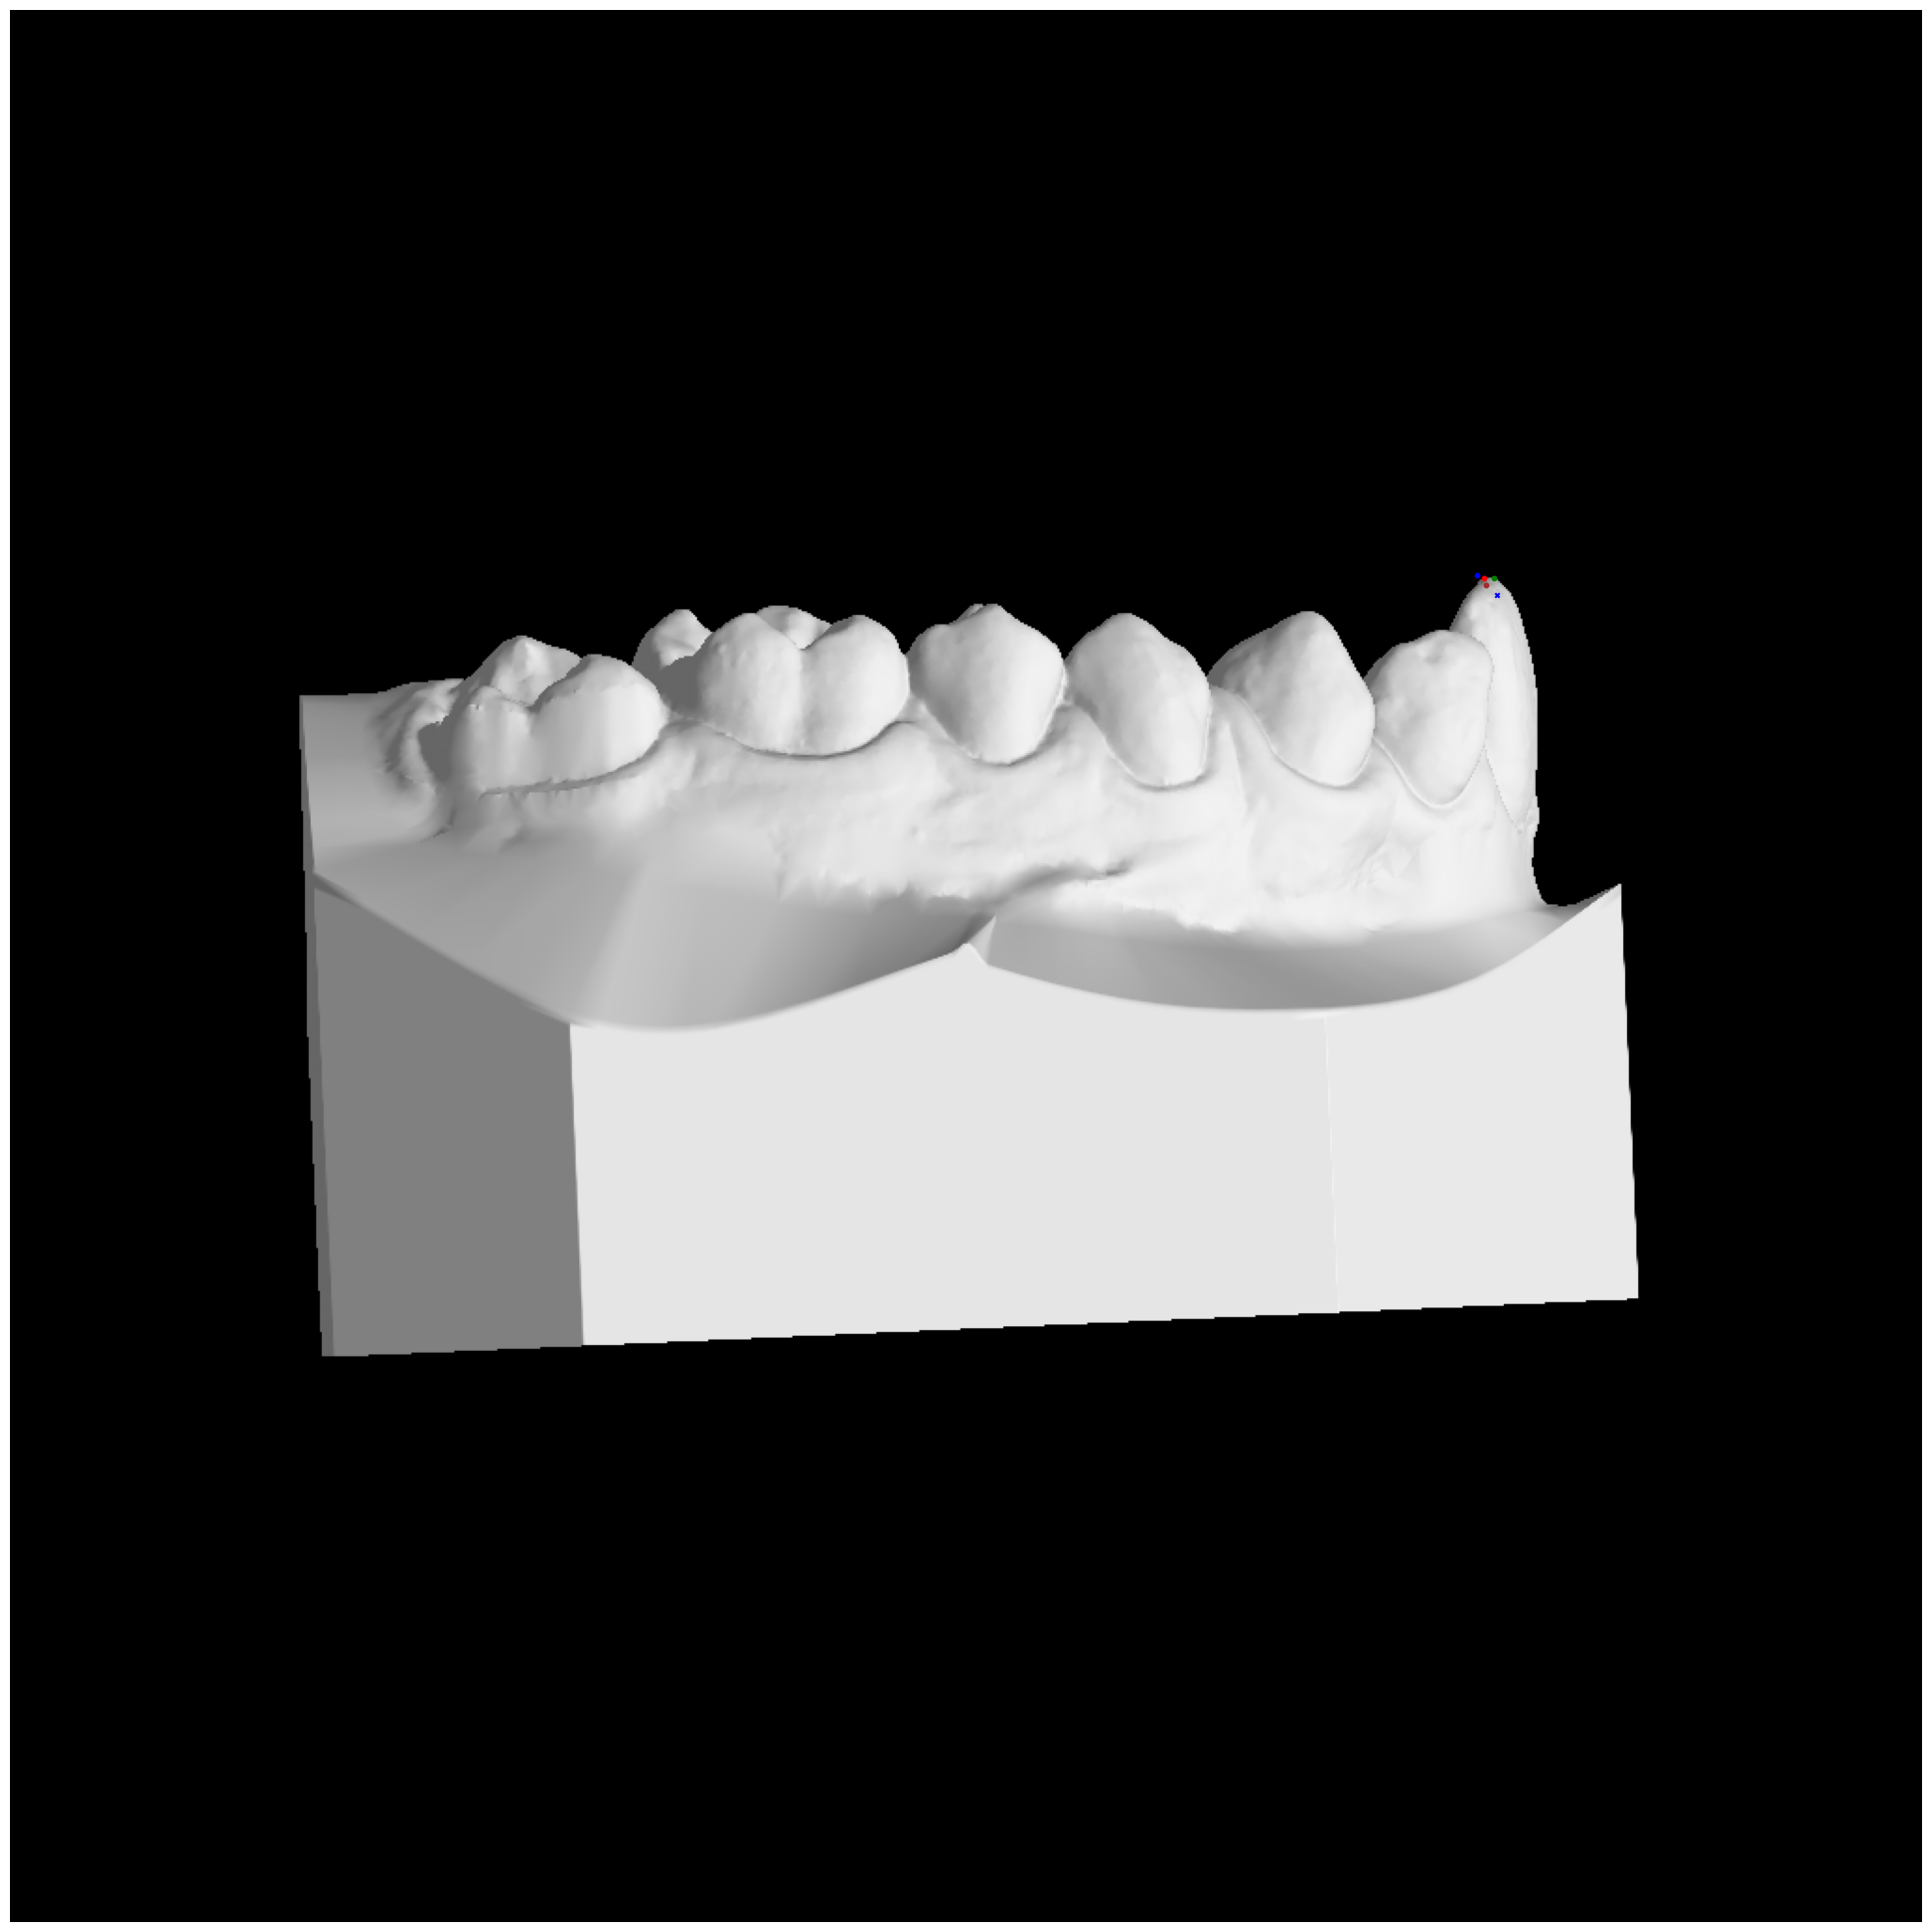

Initial: (790.0089111328125, 307.6592712402344)
Refined: (789, 304)
True (794.0, 304.0)


In [193]:
image1 = cv2.imread(f"/Users/casperbakolesen/Desktop/Github/Dataprojekt/Data/Clean Data/Overbite Data/Annotated Verification Data/{df["Filename"][25]}.png", cv2.IMREAD_GRAYSCALE)
keypoint1 = df["X_Model"][25], df["Y_Model"][25]
true_keypoint1 = df["X_True"][25], df["Y_True"][25]
guess_x, guess_y = keypoint1
true_x, true_y = true_keypoint1
refined_keypoint1 = refine_keypoint(image1, keypoint1, true_x, true_y, guess_x, guess_y, window_size=10)
print("Initial:", keypoint1)
print("Refined:", refined_keypoint1)
print("True", true_keypoint1)